# A Crash Course in Python

## What type of language is python?

[Python](python.org) is an interpreted high level dynamically typed garbage-collected language. This means, inlike java or C, you don't need to compile python code.  

* *Interpreted*: You interact with the language via a [REPL](https://en.wikipedia.org/wiki/Read%E2%80%93eval%E2%80%93print_loop).
* *High level*: Functions themselves are objects that can be passed around.
* *Dynamically typed*: variables don't have types, values do!
* *Garbage collected*: if you create an object, and you don't need it anymore, it is automatically erased.

## Simple values

* integers
* floating point numbers
* characters
* strings

In [ ]:
12

In [ ]:
12.0

In [ ]:
"Ceci n'est pas une pipe."

### Do not confuse the finger pointing at the moon with the moon.

> As the ignorant grasp the finger-tip and not the moon, so those who cling to the letter, know not my truth.
> *Lankavatara Sutra*

![Magritte: Ceci n'est pas une pipe](images/MagrittePipe.jpg)

Image: [*La Trahison des images* by Rene Magritte](https://en.wikipedia.org/wiki/The_Treachery_of_Images)

In [ ]:
a = "Ceci n'est pas une pipe"
a

Variables are temporal *pointers* that point to values kept in memory, and nothing else. The relationships between variables are static, say unlike excel.

In [ ]:
a = 12
b = a+1
a = 20
b

In [ ]:
a = 0
a = a + 1
a = a + 2
a

## Container types

* arrays
* lists
* sets
* maps (dictionaries in python parlance)

In [ ]:
[1,2,4,8,16]

In [ ]:
(1,2,4,8,16)

In [ ]:
{1,2,4,8,16}

In [ ]:
{'a': 1, 'b': 2, 'c': 4}

In [ ]:
a = {'a': 1, 'b': 2, 'c': 4}
a['a']

## Things you can do with container types


In [56]:
xs = [1,2,3]
ys = [4,5,6]
xs + ys

[1, 2, 3, 4, 5, 6]

In [57]:
xs

[1, 2, 3]

In [58]:
xs.extend(ys)
xs

[1, 2, 3, 4, 5, 6]

1

## Control structures

* `if` statements, `while` and `for` loops:

In [ ]:
a = 0

if a % 2 == 0:
    print("even")
else: 
    print("odd")

In [62]:
a,b = 1,1
i = 0
res = [1,1]
while i < 10:
    i = i+1
    a,b = b,a+b
    res.append(b)
res

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]

In [61]:
res = [1,1]
for i in range(10):
    res.append(res[i] + res[i+1])
res

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]

## Comprehensions

Comprehensions is a useful idiom that makes a lot of things easy:

Say you have an array,

In [ ]:
a = [-1,0,2,-1,2,0,-2,3,4,0,0,2,3,4]

but you need to apply a specific function to it, say taking squares. In python we use comprehensions:

In [ ]:
[ x*x for x in a ]

In [ ]:
{ x*x for x in a if x > 0 }

## Functions

A function is an object that takes inputs and produces an output.



In [ ]:
def fibonacci(n):
    res = [1,1]
    for i in range(n-2):
        res = res + [ res[i] + res[i+1] ]
    return(res)

In [ ]:
fibonacci(120)

## What are we dealing with?

![Interaction graph](images/interaction.png)


## Libraries

In this class we are going to use the following libraries **a lot**:

* [`numpy`](http://www.numpy.org/)
* [`pandas`](https://pandas.pydata.org/)
* [`scipy`](https://docs.scipy.org/doc/scipy/reference/index.html)
* [`scikit-learn`](http://scikit-learn.org/stable/)
* [`matplotlib`](https://matplotlib.org/)

We import libraries as follows:

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [ ]:
a = np.matrix(np.random.rand(2,4))
b = np.matrix(np.random.rand(4,5))
c = a*b
c.shape

In [ ]:
plt.hist(stats.norm.rvs(size=1000))
plt.show()

## How can we get help on a library function?



In [ ]:
help(stats.norm)

# A simple example 

In the first example we are going to write, we are going to approximate $\pi$ using random numbers: the probability that a uniformly randomly chosen point in the square determined by $(0,0)$ and $(1,1)$ that lies in the quarter of a  disk $x^2+y^2\leq 1$ is $\frac{\pi}{4}$.



In [ ]:
count = 0
N = 1000
for i in range(N):
    x = np.random.rand()
    y = np.random.rand()
    if(x**2 + y**2 <= 1):
        count = count + 1
count*4/N

In [ ]:
count = 0
N = 1000
points = np.random.rand(N,2)
for i in range(N):
    if( points[i,0]**2 + points[i,1]**2 <= 1):
        count = count + 1
count*4/N

In [ ]:
def circle(x,y): return(x**2 + y**2 <= 1)

N = 1000
points = np.random.rand(N,2)
count = np.array([1 for i in range(N) if circle(points[i,0], points[i,1])]).sum()
count*4/N

In [ ]:
def area(N, fn):
    points = np.random.rand(N,2)
    count = np.array([1 for i in range(N) if fn(points[i,0], points[i,1])]).sum()
    return(count/N)

In [ ]:
4*area(2000,circle)

In [ ]:
def line(x,y): return(y<=x)

area(4000,line)

In [ ]:
area(5000, lambda x,y: y<=x)

In [ ]:
area(5000, lambda x,y: y<=x**2)

In [ ]:
area(5000, lambda x,y: x**2+y**2<=1)*4

# Another example (exchange rates)



In [1]:
from urllib.request import urlopen
from xmltodict import parse

In [2]:
conn = urlopen("http://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml")
raw = parse(conn.read().decode('utf8'))
conn.close()

In [3]:
raw['gesmes:Envelope']['Cube']['Cube']['Cube']

[{'@currency': 'USD', '@rate': '0.9754'},
 {'@currency': 'JPY', '@rate': '139.43'},
 {'@currency': 'BGN', '@rate': '1.9558'},
 {'@currency': 'CZK', '@rate': '24.658'},
 {'@currency': 'DKK', '@rate': '7.4365'},
 {'@currency': 'GBP', '@rate': '0.88201'},
 {'@currency': 'HUF', '@rate': '406.30'},
 {'@currency': 'PLN', '@rate': '4.7543'},
 {'@currency': 'RON', '@rate': '4.9433'},
 {'@currency': 'SEK', '@rate': '10.9328'},
 {'@currency': 'CHF', '@rate': '0.9565'},
 {'@currency': 'ISK', '@rate': '139.90'},
 {'@currency': 'NOK', '@rate': '10.2335'},
 {'@currency': 'HRK', '@rate': '7.5228'},
 {'@currency': 'TRY', '@rate': '17.9515'},
 {'@currency': 'AUD', '@rate': '1.4828'},
 {'@currency': 'BRL', '@rate': '5.0456'},
 {'@currency': 'CAD', '@rate': '1.3177'},
 {'@currency': 'CNY', '@rate': '6.9442'},
 {'@currency': 'HKD', '@rate': '7.6567'},
 {'@currency': 'IDR', '@rate': '14697.30'},
 {'@currency': 'ILS', '@rate': '3.4152'},
 {'@currency': 'INR', '@rate': '79.0705'},
 {'@currency': 'KRW', '@rat

In [4]:
rates = {x['@currency']: float(x['@rate']) for x in raw['gesmes:Envelope']['Cube']['Cube']['Cube']}
rates

{'USD': 0.9754,
 'JPY': 139.43,
 'BGN': 1.9558,
 'CZK': 24.658,
 'DKK': 7.4365,
 'GBP': 0.88201,
 'HUF': 406.3,
 'PLN': 4.7543,
 'RON': 4.9433,
 'SEK': 10.9328,
 'CHF': 0.9565,
 'ISK': 139.9,
 'NOK': 10.2335,
 'HRK': 7.5228,
 'TRY': 17.9515,
 'AUD': 1.4828,
 'BRL': 5.0456,
 'CAD': 1.3177,
 'CNY': 6.9442,
 'HKD': 7.6567,
 'IDR': 14697.3,
 'ILS': 3.4152,
 'INR': 79.0705,
 'KRW': 1381.97,
 'MXN': 19.5708,
 'MYR': 4.4659,
 'NZD': 1.6846,
 'PHP': 57.217,
 'SGD': 1.3897,
 'THB': 36.636,
 'ZAR': 17.3853}

In [5]:
rates['TRY']

17.9515

In [6]:
def getExchangeRates():
    conn = urlopen("http://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml")
    raw = parse(conn.read().decode('utf8'))
    conn.close()
    rates = {x['@currency']: float(x['@rate']) for x in raw['gesmes:Envelope']['Cube']['Cube']['Cube']}
    return(rates)

In [7]:
rates = getExchangeRates()
rates['USD']

0.9754

In [23]:
def QueryECB(Cfrom, Cto):
    with urlopen("https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D." + Cfrom + "." + Cto + ".SP00.A") as url:
        raw = parse(url.read().decode('utf8'))
    data = raw['message:GenericData']['message:DataSet']['generic:Series']['generic:Obs']
    dates = [x['generic:ObsDimension']['@value'] for x in data]
    rates = [float(x['generic:ObsValue']['@value']) for x in data]
    return pd.DataFrame({'Date': dates, 'Rate': rates})
    
CADEUR = QueryECB('CAD','EUR')
CADEUR

,Date,Rate
0,1999-01-04,1.8004
1,1999-01-05,1.7965
2,1999-01-06,1.7711
3,1999-01-07,1.7602
4,1999-01-08,1.7643
...,...,...
6135,2022-09-19,1.3294
6136,2022-09-20,1.3268
6137,2022-09-21,1.3262
6138,2022-09-22,1.3278


<AxesSubplot:xlabel='Date'>

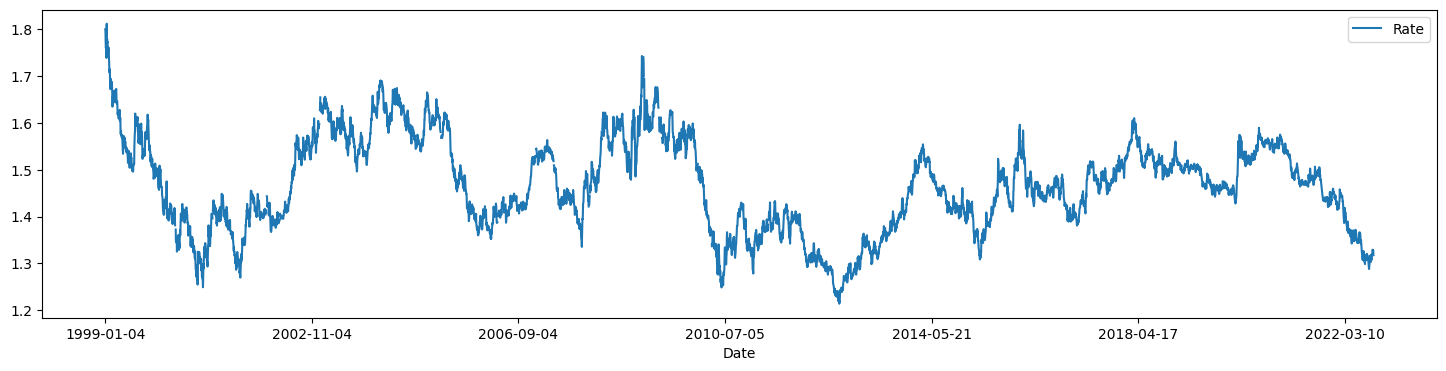

In [27]:
CADEUR.plot(figsize=(18,4),x='Date',y='Rate')

# Yet Another example

This time we are going to look at [Dr. Ignaz Semmelweis'](https://en.wikipedia.org/wiki/Ignaz_Semmelweis) who discovered the [importance of handwashing](https://www.newscientist.com/people/ignaz-semmelweis/). The data comes from [Kaggle](https://www.kaggle.com/code/arijit75/dr-semmelweis-and-the-discovery-of-handwashing/notebook).

Here are the yearly and monthly data:

In [30]:
yearly = pd.read_csv('./data/yearly_deaths_by_clinic.csv')
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [31]:
monthly = pd.read_csv('./data/monthly_deaths.csv')
monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


First, let us see if there are any significant changes in deaths across clinics.

In [33]:
tmp = dict(list(yearly.groupby('clinic')))
tmp

{'clinic 1':    year  births  deaths    clinic
 0  1841    3036     237  clinic 1
 1  1842    3287     518  clinic 1
 2  1843    3060     274  clinic 1
 3  1844    3157     260  clinic 1
 4  1845    3492     241  clinic 1
 5  1846    4010     459  clinic 1,
 'clinic 2':     year  births  deaths    clinic
 6   1841    2442      86  clinic 2
 7   1842    2659     202  clinic 2
 8   1843    2739     164  clinic 2
 9   1844    2956      68  clinic 2
 10  1845    3241      66  clinic 2
 11  1846    3754     105  clinic 2}

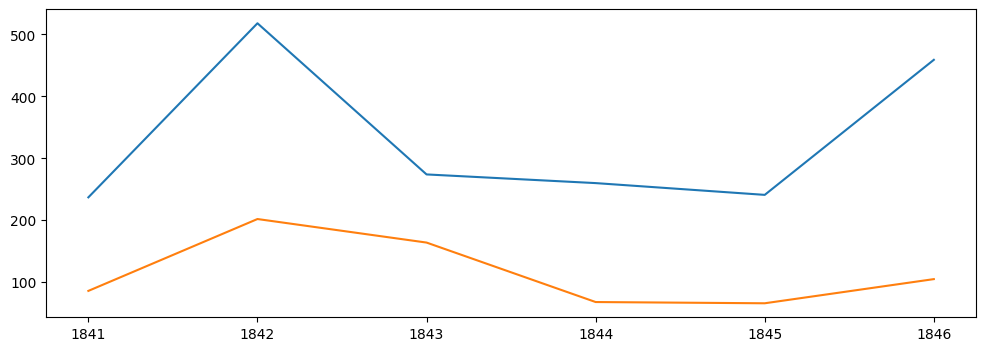

In [36]:
plt.figure(figsize=(12,4))
plt.plot(tmp['clinic 1']['year'], tmp['clinic 1']['deaths'])
plt.plot(tmp['clinic 2']['year'], tmp['clinic 2']['deaths'])

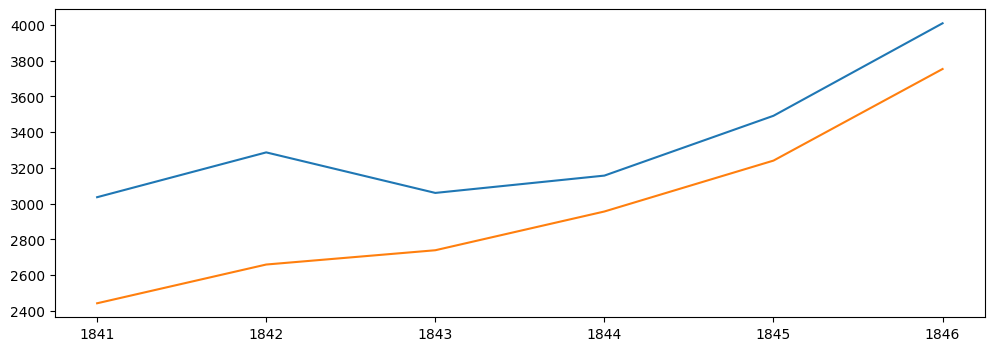

In [37]:
plt.figure(figsize=(12,4))
plt.plot(tmp['clinic 1']['year'], tmp['clinic 1']['births'])
plt.plot(tmp['clinic 2']['year'], tmp['clinic 2']['births'])

In [39]:
rates = [tmp[f'clinic {i+1}']['deaths']/tmp[f'clinic {i+1}']['births'] for i in range(2)]
rates

[0    0.078063
 1    0.157591
 2    0.089542
 3    0.082357
 4    0.069015
 5    0.114464
 dtype: float64,
 6     0.035217
 7     0.075968
 8     0.059876
 9     0.023004
 10    0.020364
 11    0.027970
 dtype: float64]

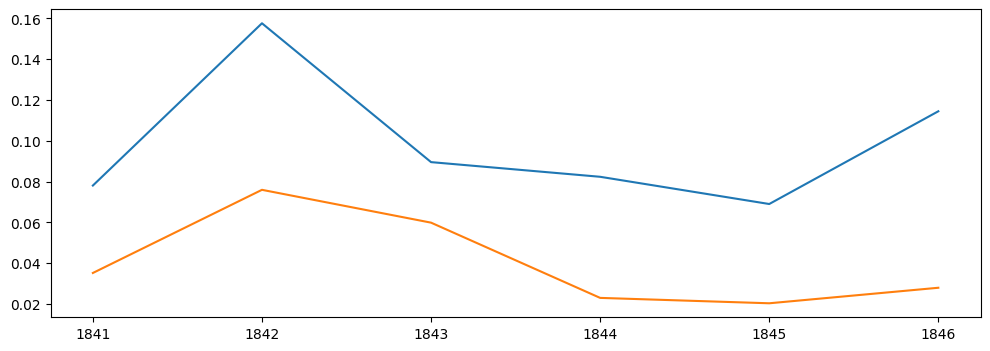

In [40]:
plt.figure(figsize=(12,4))
plt.plot(tmp['clinic 1']['year'],rates[0])
plt.plot(tmp['clinic 1']['year'],rates[1])

Question: how do we test if there is a statistically significant difference between these numbers?

In [42]:
stats.ttest_rel(rates[0],rates[1])

Ttest_relResult(statistic=6.3759924953655505, pvalue=0.0014041556191018375)

In [43]:
monthly['date'] =  pd.to_datetime(monthly['date'])
monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [44]:
start = pd.to_datetime('1847-06-01')
before = monthly[monthly["date"] < start]
after = monthly[monthly["date"] >= start]

In [45]:
before

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
71,1847-01-01,311,10
72,1847-02-01,312,6
73,1847-03-01,305,11
74,1847-04-01,312,57


In [46]:
after

,date,births,deaths
76,1847-06-01,268,6
77,1847-07-01,250,3
78,1847-08-01,264,5
79,1847-09-01,262,12
80,1847-10-01,278,11
81,1847-11-01,246,11
82,1847-12-01,273,8
83,1848-01-01,283,10
84,1848-02-01,291,2
85,1848-03-01,276,0


In [47]:
rates_before = before['deaths']/before['births']
rates_before 

0     0.145669
1     0.075314
2     0.043321
3     0.015686
4     0.007843
        ...   
71    0.032154
72    0.019231
73    0.036066
74    0.182692
75    0.122449
Length: 76, dtype: float64

In [48]:
rates_after = after['deaths']/after['births']
rates_after

76    0.022388
77    0.012000
78    0.018939
79    0.045802
80    0.039568
81    0.044715
82    0.029304
83    0.035336
84    0.006873
85    0.000000
86    0.006557
87    0.009585
88    0.011364
89    0.003717
90    0.000000
91    0.009615
92    0.023411
93    0.029032
94    0.013405
95    0.022333
96    0.030848
97    0.049261
dtype: float64

In [49]:
stats.ttest_ind(rates_before,rates_after)

Ttest_indResult(statistic=5.511607211341916, pvalue=2.985436556724523e-07)